# Práctica 2: *Clustering*
## Tratamiento Inteligente de Datos

Autor: Pedro Manuel Flores Crespoo

Primero realizamos algunos imports necesarios

In [ ]:
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

seed = 75

Importamos el archivo y eliminamos la primera columna (que es la que queremos "adivinar")

In [ ]:
wine = pd.read_csv("wine.data", header=None)
data = wine.iloc[:,1:]
data.shape

(178, 13)

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Visualizamos los datos tras la reducción de 3 dimensiones

In [ ]:
from sklearn.manifold import TSNE

data_tsne = TSNE(n_components=3, random_state=seed).fit_transform(data)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_tsne, x=0, y=1, z=2,
              color=wine[0], size=[0.1 for i in range(178)], symbol=wine[0])
fig.show()

### *Clustering* jerárquico

In [ ]:
import scipy.cluster.hierarchy as shc

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *ward*

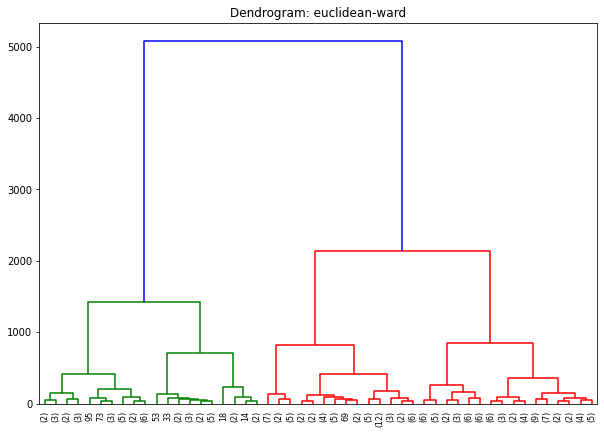

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-ward")
dend = shc.dendrogram(shc.linkage(data, method='ward', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *single*

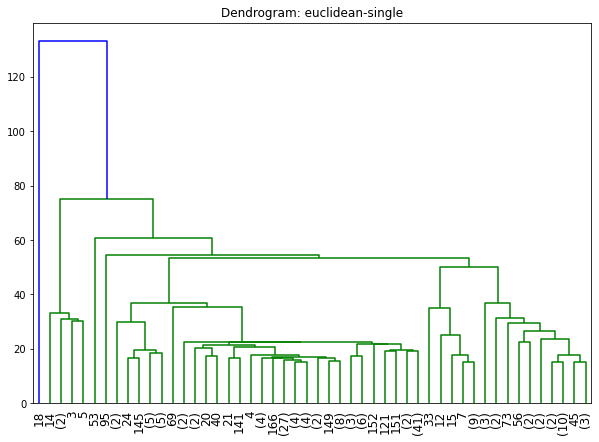

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-single")
dend = shc.dendrogram(shc.linkage(data, method='single', metric='euclidean'),
                      truncate_mode='lastp',  # show only the last p merged clusters
                      leaf_font_size = 12,
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *centroid*

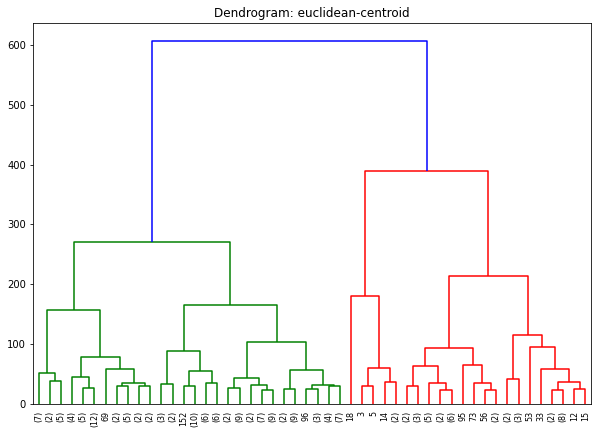

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-centroid")
dend = shc.dendrogram(shc.linkage(data, method='centroid', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *complete*

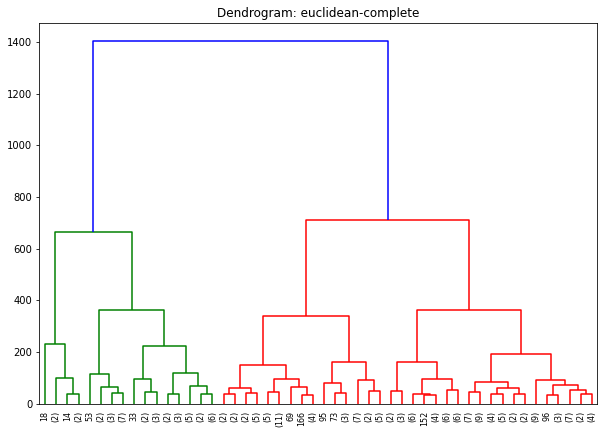

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-complete")
dend = shc.dendrogram(shc.linkage(data, method='complete', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

### *Outliers*

Usamos el algoritmo kNN para detectarlos

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN
import pandas as pd

X = data # data NO contiene la característica clase

clf = KNN(contamination=0.2)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

outliers = []
for i,j in enumerate(y_pred):
  if j == 1:
    outliers.append(i)

print(outliers)

[2, 3, 5, 10, 12, 13, 14, 17, 18, 20, 26, 28, 31, 33, 35, 40, 47, 50, 52, 53, 56, 69, 73, 78, 80, 93, 95, 96, 141, 150]


In [ ]:
len(outliers)

30

In [ ]:
wine_no = wine.copy()
wine_no = wine_no.drop(outliers)
data_no = wine_no.iloc[:,1:]

data_tsne_no = TSNE(n_components=3, random_state=seed).fit_transform(data_no)

In [ ]:
fig = px.scatter_3d(data_tsne_no, x=0, y=1, z=2,
              color=wine_no[0], size=[0.1 for i in range(148)], symbol=wine_no[0] )
fig.show()

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *ward*

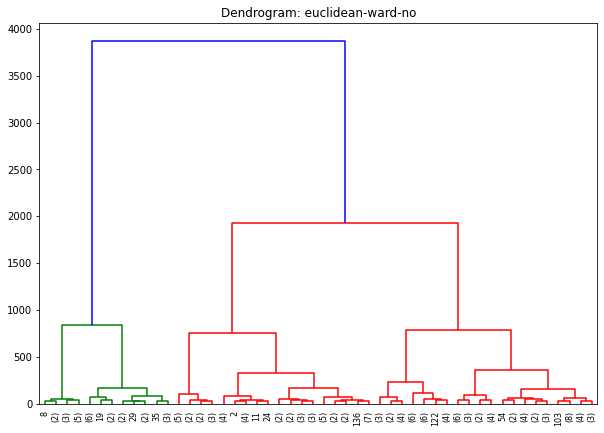

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-ward-no")
dend = shc.dendrogram(shc.linkage(data_no, method='ward', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *single*

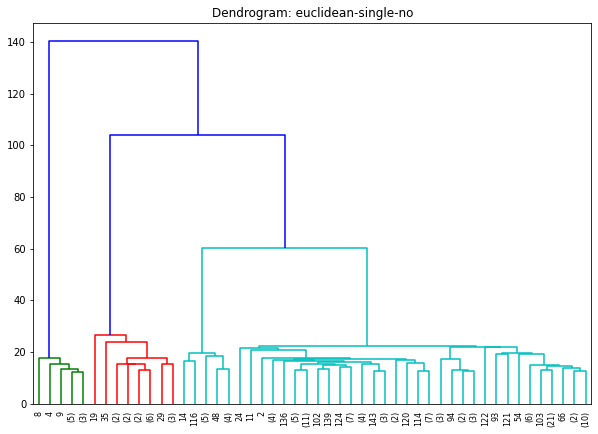

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-single-no")
dend = shc.dendrogram(shc.linkage(data_no, method='single', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *centroid*

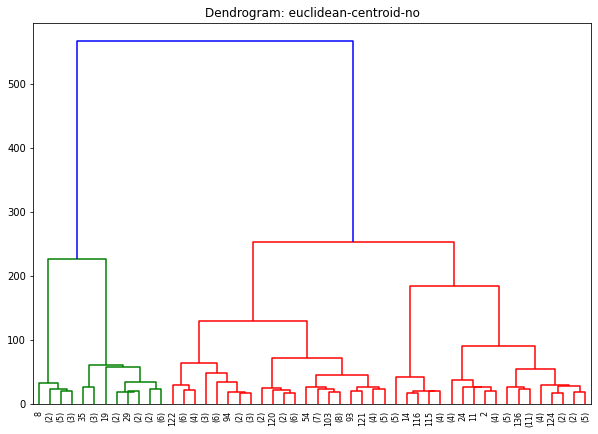

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-centroid-no")
dend = shc.dendrogram(shc.linkage(data_no, method='centroid', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

Dendograma: 
 * Métrica: euclídea.
 * Distancia entre clústeres *complete*

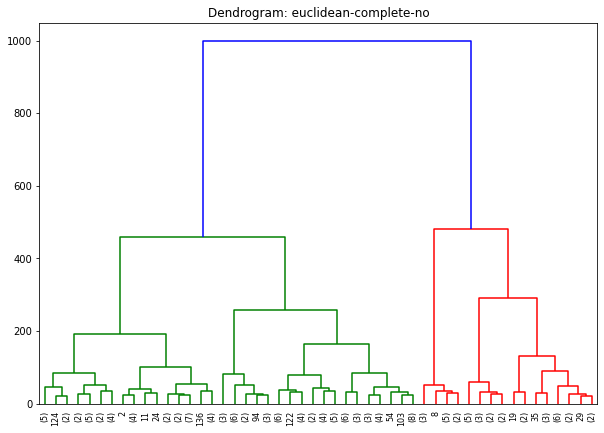

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram: euclidean-complete-no")
dend = shc.dendrogram(shc.linkage(data_no, method='complete', metric='euclidean'), 
                      truncate_mode='lastp',  # show only the last p merged clusters
                      p = 50)

### K-medias

Primero, normalizaomos los datos

In [ ]:
from sklearn import preprocessing

x = data_no.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_norm = pd.DataFrame(x_scaled)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.279330,0.982759,0.716535,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.754509
1,0.571053,0.205534,0.417112,0.033520,0.517241,0.657480,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.739479
2,0.581579,0.365613,0.807487,0.581006,0.827586,0.716535,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.423848
3,0.884211,0.223320,0.582888,0.223464,0.448276,0.598425,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.979960
4,0.797368,0.278656,0.668449,0.391061,0.879310,0.637795,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.984970


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 6,
    "max_iter": 300,
    "random_state": seed,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_norm)
    sse.append(kmeans.inertia_)

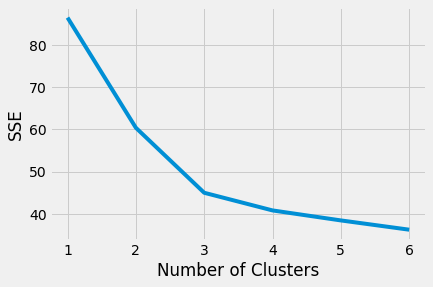

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 7), sse)
 plt.xticks(range(1, 7))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Usmaos `kneed` para detectar automáticamente el *codo*

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 7), sse, curve="convex", direction="decreasing")
kl.elbow

3

Usamos también el coeficiente de silueta

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(data_norm)
  score = silhouette_score(data_norm, kmeans.labels_)
  silhouette_coefficients.append(score)

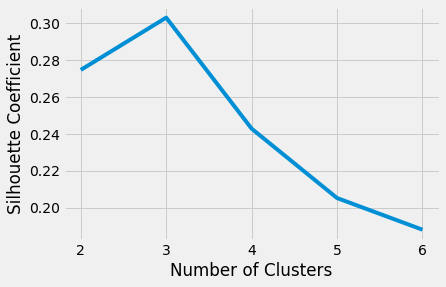

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 6,
    "max_iter": 300,
    "random_state": seed,
}
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=6, n_jobs=None, precompute_distances='auto', random_state=75,
       tol=0.0001, verbose=0)

No tienen que coincidir las asignaciones con las verdaderas, por lo que tenemos que hacer la correspondencia manualmente

In [ ]:
labels_intercambio = kmeans.labels_.copy()
labels_intercambio = labels_intercambio + 1 

labels_intercambio[ labels_intercambio == 1] = 4
labels_intercambio[ labels_intercambio == 3] = 1
labels_intercambio[ labels_intercambio == 4] = 3

In [ ]:
fig = px.scatter_3d(data_tsne_no, x=0, y=1, z=2,
              color=labels_intercambio, size=[0.1 for i in range(148)], symbol=labels_intercambio)
fig.show()

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(wine_no[0], labels_intercambio, labels=[1, 2, 3]))
print(metrics.classification_report(wine_no[0], labels_intercambio, labels=[1, 2, 3]))

[[38  0  0]
 [ 1 57  6]
 [ 0  0 46]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        38
           2       1.00      0.89      0.94        64
           3       0.88      1.00      0.94        46

    accuracy                           0.95       148
   macro avg       0.95      0.96      0.96       148
weighted avg       0.96      0.95      0.95       148



### Reducción de la dimensionalidad

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data_pca = data_norm.copy()
pca = PCA(n_components=2)
pca.fit(data_pca)
data_pca = pca.transform(data_pca)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "max_iter": 300,
    "random_state": seed,
}
kmeans_pca = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans_pca.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=75,
       tol=0.0001, verbose=0)

In [ ]:
labels_int_pca = kmeans_pca.labels_.copy()
labels_int_pca = labels_int_pca + 1 

labels_int_pca[ labels_int_pca == 1] = 4
labels_int_pca[ labels_int_pca == 3] = 1
labels_int_pca[ labels_int_pca == 4] = 3

In [ ]:
labels_int_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
fig = px.scatter_3d(data_tsne_no, x=0, y=1, z=2,
              color=labels_int_pca, size=[0.1 for i in range(148)], symbol=labels_int_pca)
fig.show()

In [ ]:
print(metrics.confusion_matrix(wine_no[0], labels_int_pca, labels=[1, 2, 3]))
print(metrics.classification_report(wine_no[0], labels_int_pca, labels=[1, 2, 3]))

[[38  0  0]
 [ 1 57  6]
 [ 0  0 46]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        38
           2       1.00      0.89      0.94        64
           3       0.88      1.00      0.94        46

    accuracy                           0.95       148
   macro avg       0.95      0.96      0.96       148
weighted avg       0.96      0.95      0.95       148



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_norm_out = pd.DataFrame(x_scaled)
data_norm_out.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


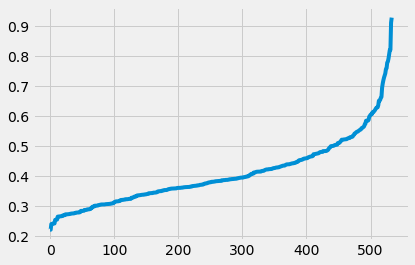

In [118]:
from sklearn.neighbors import DistanceMetric, kneighbors_graph

## Parametrización de DBSCAN.
dist = DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(data_norm_out)
minPts  = 3 # Fijamos el parámetro minPts
A = kneighbors_graph(data_norm_out, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()

In [119]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(data_norm_out)
print(dbscan.labels_)

# [2, 3, 5, 10, 12, 13, 14, 17, 18, 20, 26, 28, 31, 33, 35, 40, 47, 50, 52, 53, 56, 69, 73, 78, 80, 93, 95, 96, 141, 150]
data[dbscan.labels_ == -1]

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1  0  0  0  0  0  0  1 -1 -1 -1
  0 -1 -1  0  0  0 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


,1,2,3,4,5,6,7,8,9,10,11,12,13
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.120,2.91,1150
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.050,1.82,520
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.360,3.16,410
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.310,3.50,985
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.990,3.13,886
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.060,2.31,750
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.190,3.13,463
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.160,2.63,937


In [120]:
fig = px.scatter_3d(data_tsne, x=0, y=1, z=2, 
              color=dbscan.labels_, size=[0.1 for i in range(178)], symbol=wine[0])
fig.show()